# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | belaya kalitva
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | lhuentse
Processing Record 6 of Set 1 | kone
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | p'ot'i
Processing Record 9 of Set 1 | kachug
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | nkove
Processing Record 12 of Set 1 | taichung
Processing Record 13 of Set 1 | koneurgench
City not found. Skipping...
Processing Record 14 of Set 1 | sao gabriel da cachoeira
Processing Record 15 of Set 1 | kuanda
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | cannonvale
Processing Record 41 of Set 4 | tromso
Processing Record 42 of Set 4 | el granada
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | sarmiento
Processing Record 45 of Set 4 | tralee
Processing Record 46 of Set 4 | kimbe
Processing Record 47 of Set 4 | toga village
City not found. Skipping...
Processing Record 48 of Set 4 | tolanaro
Processing Record 49 of Set 4 | barra de santo antonio
Processing Record 0 of Set 5 | ponta delgada
Processing Record 1 of Set 5 | chegdomyn
Processing Record 2 of Set 5 | ibiza
Processing Record 3 of Set 5 | crateus
Processing Record 4 of Set 5 | tekane
City not found. Skipping...
Processing Record 5 of Set 5 | tadine
Processing Record 6 of Set 5 | khandyga
Processing Record 7 of Set 5 | port hueneme
Processing Record 8 of Set 5 | fehmarn
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | vila velha
Processing Record 11 of Set 5 | lowestoft
Processing Record 12 of Set 5 | u

Processing Record 33 of Set 8 | bougouni
Processing Record 34 of Set 8 | marco island
Processing Record 35 of Set 8 | gizo
Processing Record 36 of Set 8 | brookings
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | port moresby
Processing Record 40 of Set 8 | praia da vitoria
Processing Record 41 of Set 8 | cooper's town
Processing Record 42 of Set 8 | broome
Processing Record 43 of Set 8 | bamboo flat
Processing Record 44 of Set 8 | novyy buh
Processing Record 45 of Set 8 | phan thiet
Processing Record 46 of Set 8 | sitangkai
Processing Record 47 of Set 8 | kerikeri
Processing Record 48 of Set 8 | porbandar
Processing Record 49 of Set 8 | ritchie
Processing Record 0 of Set 9 | lepsy
Processing Record 1 of Set 9 | camana
Processing Record 2 of Set 9 | siyabuswa
Processing Record 3 of Set 9 | sofiyivka
Processing Record 4 of Set 9 | tommot
Processing Record 5 of Set 9 | robore
Processing Record 6 of Set 9 | juan griego
Processing

Processing Record 22 of Set 12 | manta
Processing Record 23 of Set 12 | katsuren-haebaru
Processing Record 24 of Set 12 | goulburn
Processing Record 25 of Set 12 | sao vicente
Processing Record 26 of Set 12 | mount vernon
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | inarajan village
Processing Record 29 of Set 12 | asau
Processing Record 30 of Set 12 | akjoujt
Processing Record 31 of Set 12 | port saint john's
Processing Record 32 of Set 12 | la passe
Processing Record 33 of Set 12 | youssoufia
Processing Record 34 of Set 12 | limassol
Processing Record 35 of Set 12 | amta
Processing Record 36 of Set 12 | bowen
Processing Record 37 of Set 12 | bolobo
Processing Record 38 of Set 12 | puerto lempira
Processing Record 39 of Set 12 | dhidhdhoo
Processing Record 40 of Set 12 | mar del plata
Processing Record 41 of Set 12 | carolina beach
Processing Record 42 of Set 12 | sumy
Processing Record 43 of Set 12 | mahanoro
Processing Record 44 of Set 12 | eyl
Processin

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,20.56,49,73,0.51,CL,1704302148
1,talnakh,69.4865,88.3972,-27.11,84,99,4.03,RU,1704302148
2,belaya kalitva,48.1700,40.7800,-1.50,68,81,2.46,RU,1704302043
3,blackmans bay,-43.0167,147.3167,14.07,79,50,3.81,AU,1704302149
4,lhuentse,27.6679,91.1839,8.07,96,93,0.62,BT,1704302149


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,20.56,49,73,0.51,CL,1704302148
1,talnakh,69.4865,88.3972,-27.11,84,99,4.03,RU,1704302148
2,belaya kalitva,48.1700,40.7800,-1.50,68,81,2.46,RU,1704302043
3,blackmans bay,-43.0167,147.3167,14.07,79,50,3.81,AU,1704302149
4,lhuentse,27.6679,91.1839,8.07,96,93,0.62,BT,1704302149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

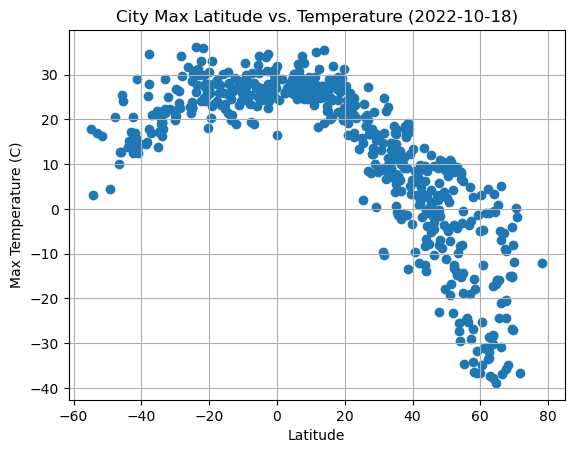

In [80]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

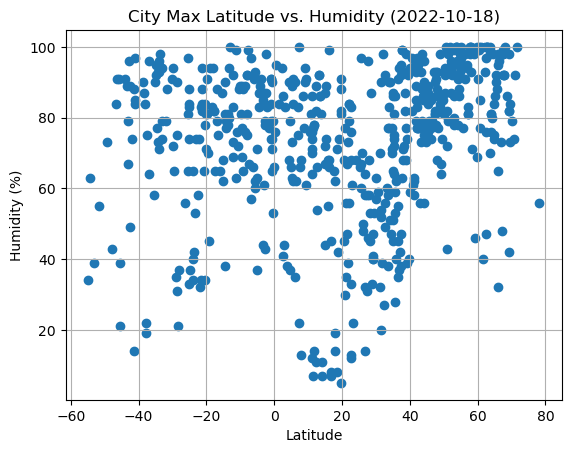

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

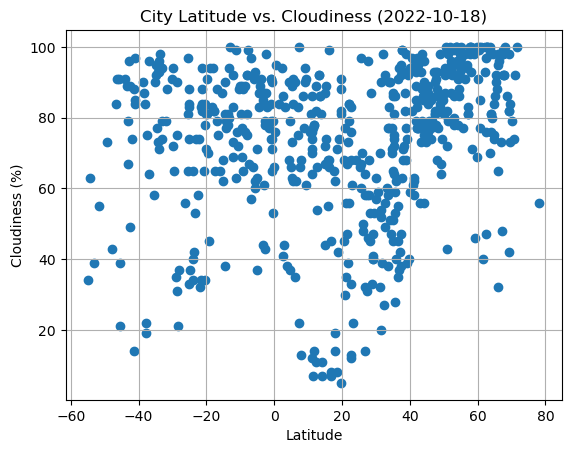

In [82]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

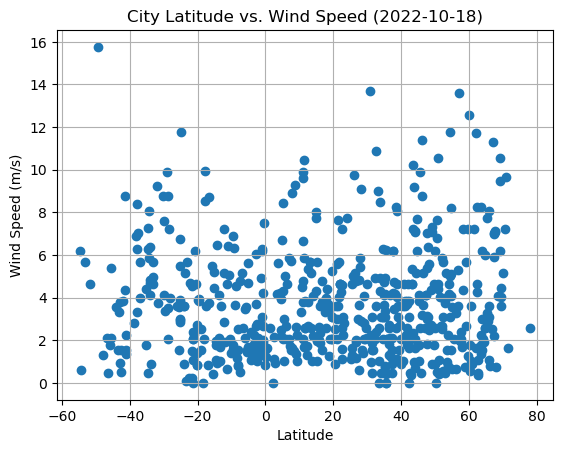

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
#plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talnakh,69.4865,88.3972,-27.11,84,99,4.03,RU,1704302148
2,belaya kalitva,48.1700,40.7800,-1.50,68,81,2.46,RU,1704302043
4,lhuentse,27.6679,91.1839,8.07,96,93,0.62,BT,1704302149
7,p'ot'i,42.1462,41.6720,9.11,77,100,1.81,GE,1704302149
8,kachug,53.9606,105.8817,-8.30,96,100,2.24,RU,1704302150


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,20.56,49,73,0.51,CL,1704302148
3,blackmans bay,-43.0167,147.3167,14.07,79,50,3.81,AU,1704302149
5,kone,-21.0595,164.8658,24.91,83,21,2.28,NC,1704302149
6,port-aux-francais,-49.3500,70.2167,4.51,73,46,15.76,TF,1704302149
10,nkove,-7.9500,30.8500,23.36,81,79,1.56,TZ,1704302150


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8570996554799597


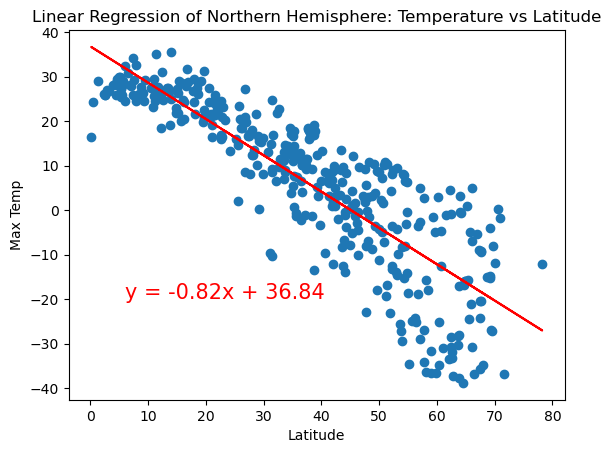

In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,-20))

plt.title("Linear Regression of Northern Hemisphere: Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

The r-value is: 0.6317571377739836


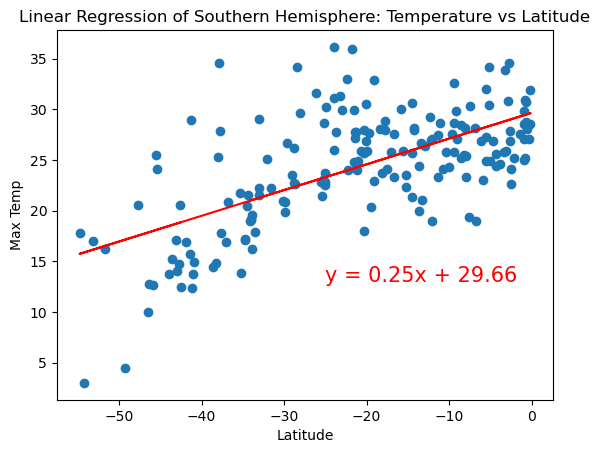

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-25,13))
                                                       

plt.title("Linear Regression of Southern Hemisphere: Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

**Discussion about the linear relationship:**
For cities located in the northern hemisphere, there is a strong negative correlation (-0.8571) between latitude and temperature. This tells us that cities which are located closer to the equator (the equator's latitude is 0°) will have higher temperatures than those that are located at a higher latitude. Conversely, for cities located in the southern hemisphere, there is a fairly strong, positive correlation (0.6318) between latitude and temperature. This indicates that the cities located in lower latitudes will have lower temperatures than those that are located closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4040589114257199


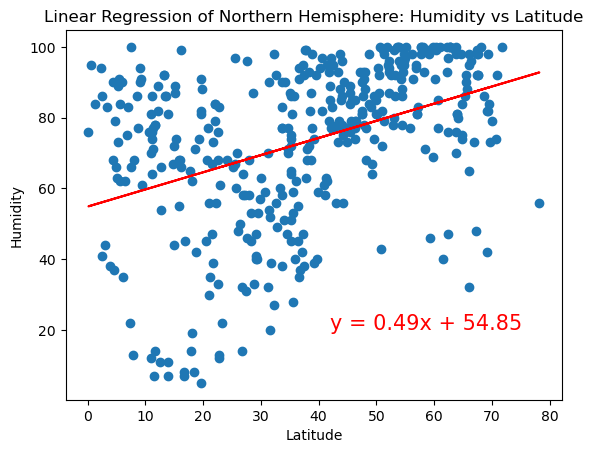

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (42,20))

plt.title("Linear Regression of Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

The r-value is: 0.15854993120628358


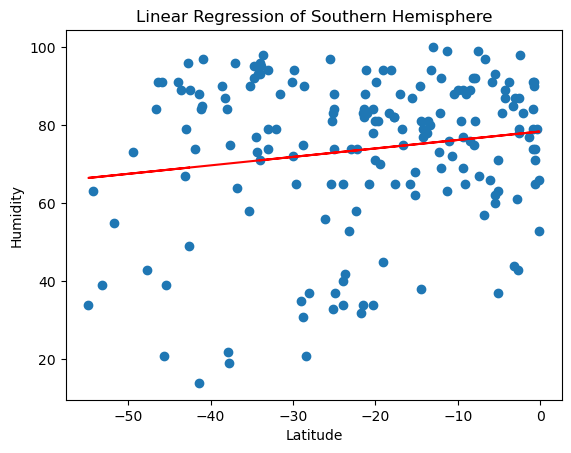

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (42,20))

plt.title("Linear Regression of Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

**Discussion about the linear relationship:**
For cities located in the northern hemisphere, there is a moderately strong, positive relationship between latitude and humidity. We can ascertain that as latitude increases from 0° to 80°, the likelihood of humidity increases as well. For cities located in the southern hemisphere, there is a very weak, positive relationship between latitude and humidity. As latitude increases, the likelihood of humidity for that city increases, but ever so slightly.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2731723737431902


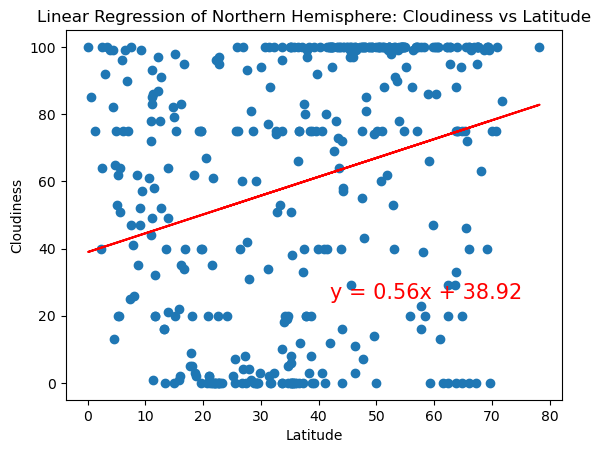

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (42,25))

plt.title("Linear Regression of Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

The r-value is: 0.1478896223781909


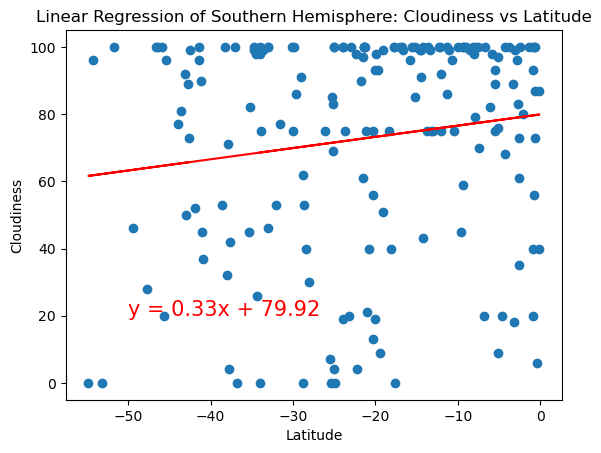

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (-50,20))

plt.title("Linear Regression of Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

**Discussion about the linear relationship:**
For cities located in the northern hemisphere, there is a weak, positive relationship (0.273) between cloudiness and latitude.  The correlation between latitude and cloudiness is very weak and positive (0.148). Because the correlations for both northern and southern hemispheres are weak, we can conclude that the relationship between a city's latitude and cloudiness level aren't related.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08975646593727982


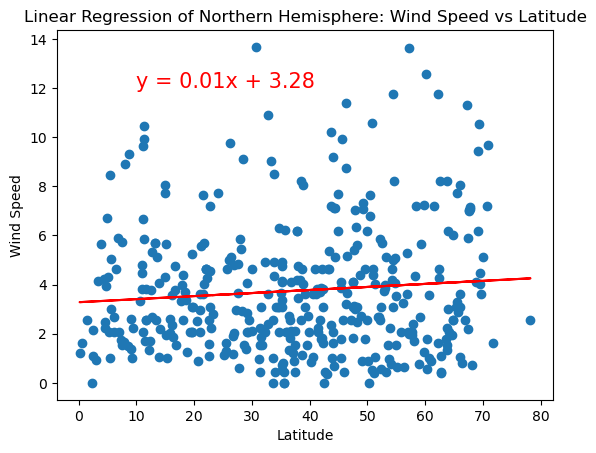

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (10,12))

plt.title("Linear Regression of Northern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

The r-value is: -0.21351615398372045


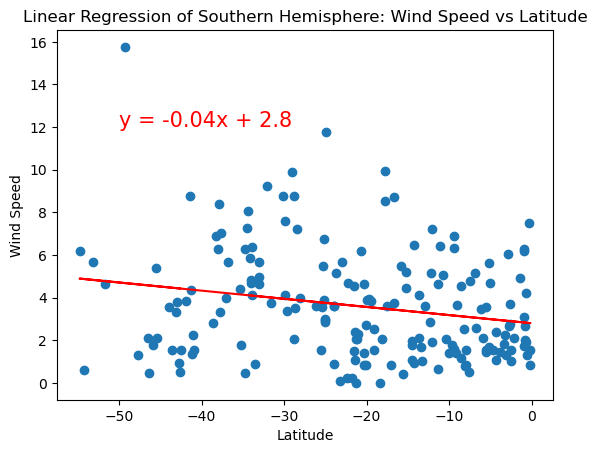

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (-50,12))

plt.title("Linear Regression of Southern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {(st.pearsonr(x_values,y_values)[0])}")

**Discussion about the linear relationship:**
For cities located in the northern hemisphere, there is a very weak, positive (0.089) correlation between its latitude and wind speed. Similarly, for cities located in the southern hemisphere, there is a weak, negative (-0.213) correlation between its latitude and wind speed. Therefore, we can say that the relationship between a city's latitude and wind speed are not related.  